In [2]:
import numpy as np
from matplotlib import pyplot as plt
plt.rcParams.update({'font.size': 15})
import numpy as np
from scipy.integrate import solve_ivp
#%config InlineBackend.figure_format='retina'

The integrate subpackage of SciPy lists several methods to solve initial value problems for ODE systems. Use them to solve the Exercise problems.

### solve_ivp(fun, t_span, y0, method='RK45', t_eval=None, dense_output=False, events=None, vectorized=False, args=None, **options)[source]

f: function
    function
    
t_span2 : 통합 간격 (t0, tf) 
    solber는 t=t0로 시작하여 t=tf에 도달할 때까지 통합됨. t0과 tf는 모두 플로트 변환 함수로 해석할 수 있는 부동 소수점 또는 값이어야 함.

y0 : initial state
    만약 초기값이 complex가 아닌 real이더라도, complex의 domain의 문제인 경우, 반드시 complex꼴로 보내야 한다.
    
method : method string or Odesolver, 선택사항
    RK45 (기본값) : Order 5의 명시적인 Runge-Kutta Method, 오류는 4차 방법의 정확성을 가정하여 제어되지만,
    5차 정확한 공식을 사용하여 단계가 수해오딘다. 복잡한 domain에 적용 될 수 있다.
    
    RK23 : Order 3의 명시적인 Runge-Kutta Method, 오류는 2차 방법의 정확성을 가정하여 제어되고, 3차 공식을 사용하여 단계를 수행한다.
    
    DOP853 : Order 8의 Runge-Kutta Method, 7차 순으로 정확한 7차 보간 다항식이 고밀도 출력에 사용됨.
    
    Radau : Radau 2a 계열의 order 5의 Runge-Kutta method 오류는 3차 임베디드 공식으로 제어된다.
    
    BDF : 미분 근사치에 대한 역방향 분화 공식을 기반으로 한 암시적 다단게 변수 순서 방법(1에서 5) 
    
    LSODA : 자동 강성 감지 및 스위칭을 갖춘 Adams/BDF 방법
    
    >>>
    DOP853은 높은 정밀도로 해결하는 데 권장된다.
    확실하지 않다면, 먼저 RK45를 실행한다. 비정상적으로 많은 반복, 갈라지거나 실패한다면, 문제가 stiff할 경우가 많으며
    이때에는 Radau 나 BDF를 사용해야 한다.
    LSODA는 또한 좋은 선택이 될 수 있지만, 오래된 포트란 코드를 감싸기 때문에 작업하기가 덜 편리할 수 있다.
    >>>
    
# 선택사항
t_eval : array_like or None, optional
    계산된 솔루션을 저장할 시간은 정렬되어야 하며 withint_span에 있어야 함. 없음(기본값)인 경우, 솔버가 선택한 점을 사용
    
dense_outputbool : bool, optional
    지속적인 해결책을 계산할지 여부. 기본값은 거짓
    
eventscallable : callable, or list of callables, optional
    추적할 이벤트. 없음(기본값)인 경우, 이벤트는 추적되지 않습니다. 
    각 사건은 시간과 상태의 연속 함수의 0에서 발생한다. 각 함수에는 서명 이벤트(t, y)가 있어야 하며 float를 반환해야 합니다. 
    솔버는 루트 찾기 알고리즘을 사용하여 이벤트(t, y(t)) = 0인 t의 정확한 값을 찾을 것이다. 
    기본적으로, 모든 0이 발견될 것이다. 솔버는 각 단계에 대한 기호 변화를 찾고 있으므로,
    한 단계 내에 여러 개의 제로 교차가 발생하면 이벤트를 놓칠 수 있습니다. 또한 각 이벤트 기능에는 다음과 같은 속성이 있을 수 있습니다:
    
    terminal: bool, optional
        이 사건이 발생하면 통합을 종료할지 여부. 할당되지 않으면 암시적으로 거짓이다.
        
    direction: float, optional
        제로 횡단의 방향. 방향이 긍정적이라면, 이벤트는 부정적에서 긍정적으로 갈 때만 트리거되고, 
        방향이 부정적이면 그 반대의 경우도 마찬가지입니다. 0이면, 어느 방향이든 이벤트를 트리거할 것이다. 
        할당되지 않은 경우 암시적으로 0.
        
    파이썬의 모든 함수에 event.terminal = True와 같은 속성을 할당할 수 있습니다.

vectorized : bool, optional

args : tuple, optional

외에 option과 관련한 것은 사이트에서 직접 확인할 것. https://docs.scipy.org/doc/scipy/reference/generated/scipy.integrate.solve_ivp.html#r179348322575-4


# return (t, y, sol, t_events, y_events, nev, nfev, njev, nlu, status, message, success)
    t : ndraay, shape(n_points,)
        time Points
        
    y : ndarray, shape (n, n_points)
        t solution의 values
        
    sol : Odesolution or None
        OdeSolution 인스턴스로 해결책을 찾았습니다; dense_output이 False로 설정된 경우 없음
        
    외 필요한 것은, 사이트 참조.


# ??? 다른 모듈? RK45
t_bound : 통합이 그 이상으로 계속되지 않을 것이다. 또한 통합

#선택사항
first_stepfloat : 초기 단계 크기
max_stepfloat : 허용되는 최대 단계 크기. 기본값은 np.inf이다. 단계 크기는 제한되지 않고 Solver에 의해서만 결정된다.

#선택사항 - 지역오차
solver는 local error estimates가 atol + rtol * abs(y)보다 적게끔 유지 될 것이다.
이때,
rtol : relative tolerances
atol : absolute tolerances

#선택사항
vectorized : bool, optional
벡털화 되어있으면 True, 안적으면 벡터화 아닌 걸로, False 값으로 추정.

# y' = y 문제 풀어보기


## 아래처럼, dense 를 조절하여 plot할 수 있다.

In [8]:
def f(x, y):
    return y 

a = solve_ivp(f, [0, 2], [1], method='RK45', dense_output = True)
t = np.linspace(0, 2, 5)

print(*a.sol(t))
#print(a.sol(t))

[1.         1.64872543 2.71830307 4.48172091 7.38932547]


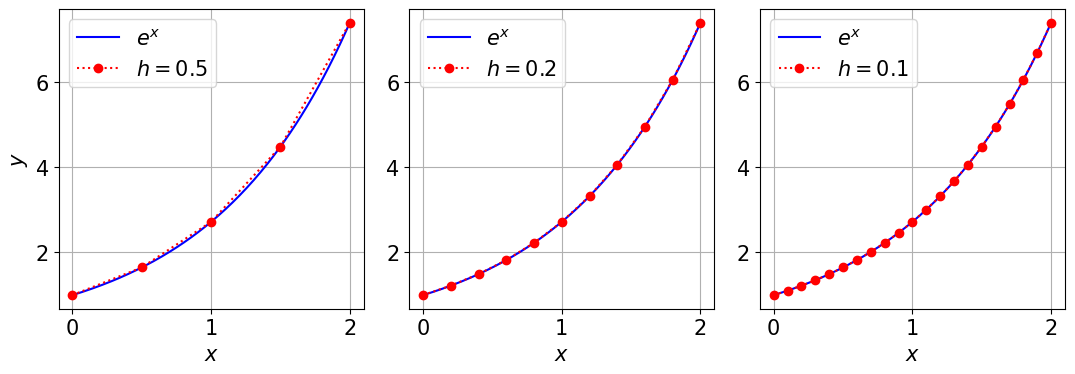

In [9]:
sol = solve_ivp(f, [0, 2], [1], method='RK45', dense_output = True)

def f(x, y):
    return y

#오차 파악 변수 설정
b = []
b.append(*a.sol(x))

i = 0
y_true = np.exp(x)



x_true = np.linspace(0, 2, 200)
y_true = np.exp(x_true)

plt.figure(figsize=[11, 4])

plt.subplot(1, 3, 1)
x = np.linspace(0, 2, 5)
plt.plot(x_true, y_true, "-b", x, *sol.sol(x), "o:r")
plt.legend(["$e^x$", f"$h = {x[1] - x[0]}$"])
plt.grid()
plt.xlabel("$x$")
plt.ylabel("$y$")

plt.subplot(1, 3, 2)
x = np.linspace(0, 2, 11)
plt.plot(x_true, y_true, "-b", x, *sol.sol(x), "o:r")
plt.legend(["$e^x$", f"$h = {x[1] - x[0]}$"])
plt.grid()
plt.xlabel("$x$")

plt.subplot(1, 3, 3)
x = np.linspace(0, 2, 21)
plt.plot(x_true, y_true, "-b", x, *sol.sol(x), "o:r")
plt.legend(["$e^x$", f"$h = {x[1] - x[0]}$"])
plt.grid()
plt.xlabel("$x$")

plt.tight_layout()
plt.show()

In [10]:
'''
def f(x, y):
    return y 

a = solve_ivp(f, [0, 2], [1], method='RK45', dense_output = True)
t = np.linspace(0, 2, 5)
'''
def error(linspace, real_function, a): #a = solve_ivp(f, [0, 2], [1], method='RK45', dense_output = True)
    t = linspace
    i = 0
    y_true = real_function(t)
    b = []
    b.append(*a.sol(t))
    for i, c in enumerate(y_true):
        print((f"오차 범위 ({t[0]} ~ {t[-1]})일때 :{y_true[i] - b[0][i]}"))
        
print(error(np.linspace(0, 2, 5), lambda x: np.exp(x), a))
print(error(np.linspace(0, 2, 11), lambda x: np.exp(x), a))
print(error(np.linspace(0, 2, 21), lambda x: np.exp(x), a))

오차 범위 (0.0 ~ 2.0)일때 :0.0
오차 범위 (0.0 ~ 2.0)일때 :-4.156935837329456e-06
오차 범위 (0.0 ~ 2.0)일때 :-2.1237760380099502e-05
오차 범위 (0.0 ~ 2.0)일때 :-3.1839687372858805e-05
오차 범위 (0.0 ~ 2.0)일때 :-0.000269366909522617
None
오차 범위 (0.0 ~ 2.0)일때 :0.0
오차 범위 (0.0 ~ 2.0)일때 :-3.1015876831963496e-05
오차 범위 (0.0 ~ 2.0)일때 :-5.8258354160845016e-05
오차 범위 (0.0 ~ 2.0)일때 :7.074363789305593e-05
오차 범위 (0.0 ~ 2.0)일때 :0.00013152556591711217
오차 범위 (0.0 ~ 2.0)일때 :-2.1237760380099502e-05
오차 범위 (0.0 ~ 2.0)일때 :-0.00017003513837998696
오차 범위 (0.0 ~ 2.0)일때 :-0.00017410584998689416
오차 범위 (0.0 ~ 2.0)일때 :0.00011726622438601453
오차 범위 (0.0 ~ 2.0)일때 :9.377831619072907e-05
오차 범위 (0.0 ~ 2.0)일때 :-0.000269366909522617
None
오차 범위 (0.0 ~ 2.0)일때 :0.0
오차 범위 (0.0 ~ 2.0)일때 :-2.5798541081201165e-10
오차 범위 (0.0 ~ 2.0)일때 :-3.1015876831963496e-05
오차 범위 (0.0 ~ 2.0)일때 :-6.603546164218876e-05
오차 범위 (0.0 ~ 2.0)일때 :-5.8258354160845016e-05
오차 범위 (0.0 ~ 2.0)일때 :-4.156935837329456e-06
오차 범위 (0.0 ~ 2.0)일때 :7.074363789305593e-05
오차 범위 (0.0 ~ 2.0)일때 :0.0001275

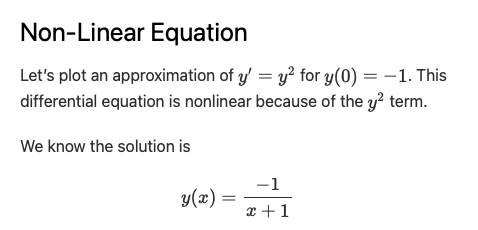

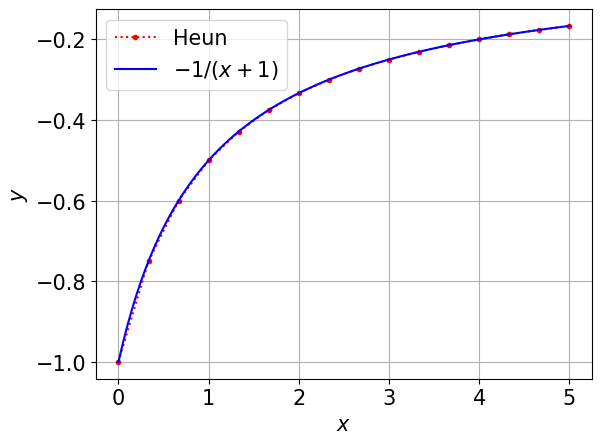

오차 범위 (0.0 ~ 5.0)일때 :0.0
오차 범위 (0.0 ~ 5.0)일때 :4.2580274439707466e-07
오차 범위 (0.0 ~ 5.0)일때 :1.0940012791893494e-05
오차 범위 (0.0 ~ 5.0)일때 :-9.795822744851357e-06
오차 범위 (0.0 ~ 5.0)일때 :-7.599695994731093e-08
오차 범위 (0.0 ~ 5.0)일때 :9.940520382389906e-07
오차 범위 (0.0 ~ 5.0)일때 :-1.6535692408115032e-06
오차 범위 (0.0 ~ 5.0)일때 :7.0241504279699996e-09
오차 범위 (0.0 ~ 5.0)일때 :4.0402445056209046e-08
오차 범위 (0.0 ~ 5.0)일때 :9.497284830239927e-07
오차 범위 (0.0 ~ 5.0)일때 :6.244511590869362e-07
오차 범위 (0.0 ~ 5.0)일때 :-1.6603436716611242e-06
오차 범위 (0.0 ~ 5.0)일때 :-1.0250484894225309e-07
오차 범위 (0.0 ~ 5.0)일때 :-1.560800641509097e-08
오차 범위 (0.0 ~ 5.0)일때 :-1.385852790858344e-08
오차 범위 (0.0 ~ 5.0)일때 :-1.2380110631093899e-08
None


In [126]:
def f(x, y):
    return y ** 2

x = np.linspace(0, 5, 16)
sol = solve_ivp(f, [0, 5], [-1], method='DOP853', dense_output = True)

x_true = np.linspace(0, 5, 100)
y_true = -1/(x_true + 1)

plt.figure()
plt.plot(x, *sol.sol(x), ".:r", x_true, y_true, "-b")
plt.legend(["Heun", "$-1/(x + 1)$"])
plt.grid()
plt.xlabel("$x$")
plt.ylabel("$y$")
plt.show()

print(error(x, lambda x: -1/(x + 1), sol))

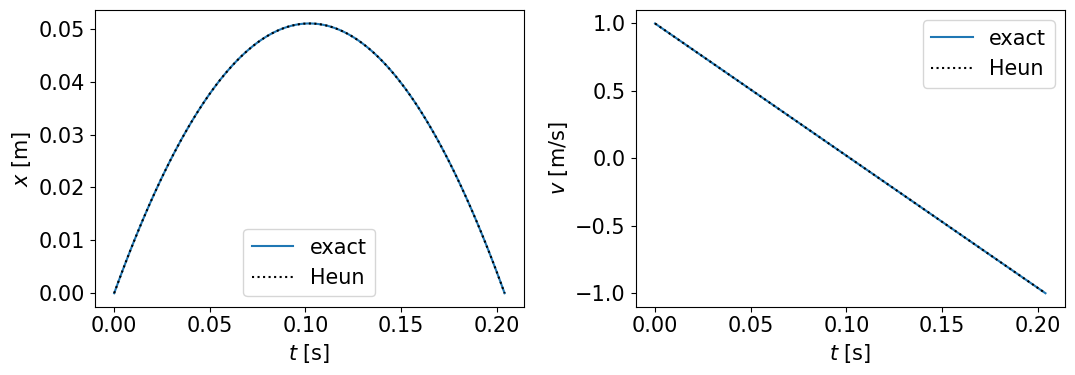

In [85]:
g = 9.8 # m/s
def F(t, Y): # F = [v, -g], Y = [x, v]
    F = [Y[1], -g]
    return np.array(F)

t    = np.linspace(0, 2/g, 100)
Y_0  = np.array([0, 1])

#zip을 이용하여 리스트 x, v 해를 추가시키자
x = []
v = []

for a, b in zip(*sol.sol(t)):
    x.append(a)
    v.append(b)
    
sol = solve_ivp(F, [0, 2/g], Y_0, method='LSODA', dense_output = True)



plt.figure(figsize=[11, 4])

plt.subplot(1, 2, 1)
plt.plot(t, -g/2*t**2 + t, '-', t, x, ':k')
plt.legend(["exact", "Heun"])
plt.xlabel("$t$ [s]")
plt.ylabel("$x$ [m]")

plt.subplot(1, 2, 2)
plt.plot(t, -g*t + 1, '-', t, v, ':k')
plt.legend(["exact", "Heun"])
plt.xlabel("$t$ [s]")
plt.ylabel("$v$ [m/s]")

plt.tight_layout()
plt.show()


예제 풀어봐야 할 것들, 수정해야 할 것들

In [27]:
def secant_while(f, xinit, predicate):
    """Return the root calculated using the secant method.

    :param f:
        A function to solve.
    :param xinit:
        A pair of initial values for x.
    :param predicate:
        A callable that takes three arguments
            - i : the iteration count
            - xy : a pair of the midpoint and the function value in the current iteration
            - dx : the change of the x value
        and returns boolean:
            - If True, the search continues.
            - If False, the search terminates.
    """

    x0, x1 = map(float, xinit)
    f0, f1 = f(x0), f(x1)
    i, x2, f2 = 0, float("nan"), float("nan")
    
    def secant_root():
        nonlocal i, x2, f2
        x2 = x1 - f1 * (x1 - x0) / (f1 - f0)
        f2 = f(x2)
        i += 1
        return i, (x2, f2), x2 - x1

    while predicate(*secant_root()):
        x0, x1 = x1, x2
        f0, f1 = f1, f2
        
    return x2

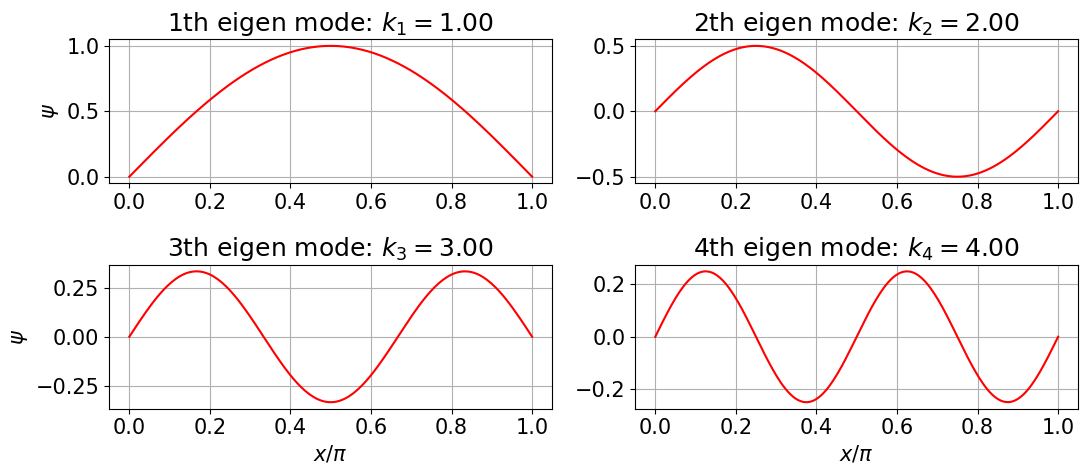

In [102]:
def F(k, x, Y):
    [psi, dpsi] = Y         # Y = [ psi   ,    dpsi/dx  ]
    F = [dpsi, -k**2 * psi] # F = [dpsi/dx, d^2 psi/dx^2]
    return np.array(F)

x, psi = None, None
def wave_function_at_L_away_scipy(k):
    global x, psi
    
    a      = 1
    Y_init = np.array([0, a])
    
    L      = np.pi
    n_divs = 200 
    x      = np.linspace(0, L, n_divs)
    
    # zip을 이용하여 리스트 psi를 만들자.
    psi = []
    sol = solve_ivp(lambda x, Y: F(k, x, Y), [0, L], [0, 1], method='BDF', dense_output = True)
    #psi = [psi for psi, dpsi in sol] 
    #대신 리스트 직접 만들어 주기.
    # 이렇게 하는 이유는, sol.sol(x) 의 경우, 결과값이, [1, 2], [3, 4] 꼴이 아닌
    # [1, 3, 5, 6, 7, .... 6, 7,] [1, 3, 5, .... 6, 7,] 이렇게 두덩이로 나오기 때문에,
    # 너무 많은 양을 zip을 할 수 없기 때문에, 각각의 요소를 하나의 리스트에 저장하는 방식을 이용한다.
    for c, d in zip(*sol.sol(x)):
        psi.append(c)
    return psi[-1] # we are only interested in psi(L)




# drawing
plt.figure(figsize=[11, 5])

# initial guesses of k to be used in root finder
k_guesses = [.9, 1.9, 2.9, 3.9]
for i, k0 in enumerate(k_guesses): # find first four eigen modes
    n = i + 1

    k = secant_while(wave_function_at_L_away_scipy, [k0, k0 - 0.01],
                     lambda i, xy, dx: abs(dx) >= 1e-7 * abs(xy[0]))

    plt.subplot(2, 2, n)
    plt.plot(x/np.pi, psi, "-r")
    plt.grid()
    if n == 3 or n == 4:
        plt.xlabel("$x/\\pi$")
    if n == 1 or n == 3:
        plt.ylabel("$\\psi$")
    plt.title(f"{n}th eigen mode: $k_{n} = {k:.2f}$")

plt.tight_layout()
plt.show()

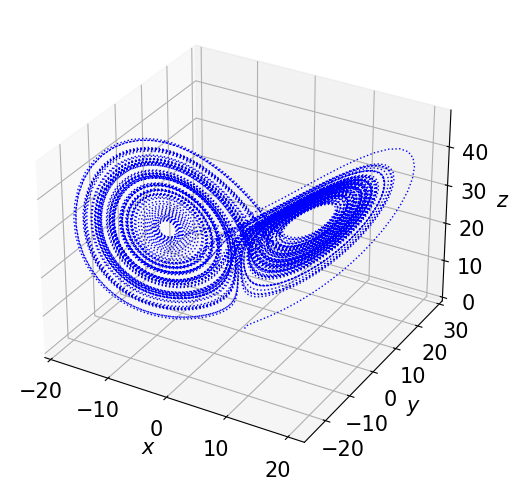

In [85]:
def F(t, Y):
    [x, y, z] = Y
    F = [10*(y - x), x*(28 - z) - y, x*y - z*8/3]
    return np.array(F)

Yinit   = np.array([1, 0, 0]) # x0, y0, z0
t       = np.linspace(0, 100, 10001)


#zip을 이용하여 리스트 x, y, z 해를 추가시키자
x = []
y = []
z = []
sol = solve_ivp(F, [0, 100], Yinit,  method='BDF', dense_output = True)
for a, b, c in zip(*sol.sol(t)):
    x.append(a)
    y.append(b)
    z.append(c)
    

plt.figure(figsize=(6, 6))
ax = plt.subplot(1, 1, 1, projection="3d")
plt.plot(x, y, z, ":b", lw=1)
ax.set_xlabel("$x$")
ax.set_ylabel("$y$")
ax.set_zlabel("$z$")

plt.show()


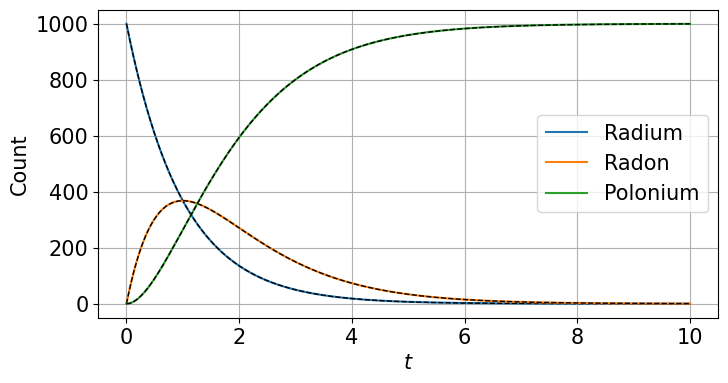

In [32]:
# constants
lam_Ra, lam_Rn         = 1, 1       # change this accordingly
N_Ra_0, N_Rn_0, N_Po_0 = 1000, 0, 0

# dY/dt
def F(t, Y): # F = [dN_Ra/dt, dN_Rn/dt, dN_Po/dt], Y = [N_Ra, N_Rn, N_Po]
    N_Ra, N_Rn, N_Po = Y
    dN_Ra = -lam_Ra * N_Ra
    dN_Rn = -lam_Rn * N_Rn + lam_Ra * N_Ra
    dN_Po = +lam_Rn * N_Rn
    return np.array([dN_Ra, dN_Rn, dN_Po])

# solve ODE
t   = np.linspace(0, 10, 1000)
Y_0 = np.array([N_Ra_0, N_Rn_0, N_Po_0])

#zip을 이용하여 리스트 x, y, z 해를 추가시키자
N_Ra = []
N_Rn = []
N_Po = []
sol = solve_ivp(F, [0, 10], Y_0,  method='RK45', dense_output = True)
for a, b, c in zip(*sol.sol(t)):
    N_Ra.append(a)
    N_Rn.append(b)
    N_Po.append(c)


# exact solution
N_Ra_true = N_Ra_0*np.exp(-lam_Ra*t)

if lam_Ra == lam_Rn:
    N_Rn_true = (N_Ra_0*lam_Ra*t + N_Rn_0)*np.exp(-lam_Rn*t)
else:
    N_Rn_true = N_Ra_0*lam_Ra/(lam_Rn - lam_Ra) * (np.exp(-lam_Ra*t) - np.exp(-lam_Rn*t))

# total number of atoms at any given time must be invariant
N_Po_true = N_Ra_0 - (N_Ra_true + N_Rn_true)



    
    
# draw
plt.figure(figsize=[8, 4])
#
plt.plot(t, N_Ra, label="Radium")
plt.plot(t, N_Ra_true, "--k", lw=1)
#
plt.plot(t, N_Rn, label="Radon")
plt.plot(t, N_Rn_true, "--k", lw=1)
#
plt.plot(t, N_Po, label="Polonium")
plt.plot(t, N_Po_true, "--k", lw=1)
#
plt.xlabel("$t$")
plt.ylabel("Count")
plt.legend()
plt.grid()
plt.show()

In [111]:
Y_0

array([1000,    0,    0])

## Practice

In [10]:
# constants
k, mu, L = 1, 1, 1

R0, r0 = 0, 10
V0, v0 = 0, L/(mu*r0)

# m1 is massive object and m2 is a satellite
m1 = 10
m2 = m1*mu / (m1 - mu)
assert m1 > 1 and m2 > 1, "masses must be greater than 1"

abstol = 1e-9
reltol = abstol

# initial values
RR_0 = np.array([0,  0])
VV_0 = np.array([V0, 0])
rr_0 = np.array([r0, 0])
vv_0 = np.array([0, v0])

xx1_0 = RR_0 + m2/(m1 + m2)*rr_0
xx2_0 = RR_0 - m1/(m1 + m2)*rr_0

vv1_0 = VV_0 + m2/(m1 + m2)*vv_0
vv2_0 = VV_0 - m1/(m1 + m2)*vv_0

Y_init = np.array([xx1_0, xx2_0, vv1_0, vv2_0])
h_init = 0.1
tlim   = 0, 24*np.pi

# derivatives
def F(t, Y):
    xx1, xx2, vv1, vv2 = Y
    r_squared = sum((xx1 - xx2)**2)
    F12 = -k/r_squared**1.5 * (xx1 - xx2)
    F21 = -F12
    return np.array([vv1, vv2, F12/m1, F21/m2])


"""
# solve ode
t, Y, h = embedded_rk4_ode(F, Y_init, h_init, tlim,
                           abstol=abstol, reltol=reltol,
                           hminmax=(1e-5, 10), max_iterations=10000)
"""


t = []
Y = []
h = []
sol = solve_ivp(F, tlim, Y_init,  method='RK45', dense_output = True)
for a, b, c in zip(*sol.sol(t)):
    t.append(a)
    Y.append(b)
    h.append(c)
    
# unpack result
xx1, xx2, vv1, vv2 = map(np.array, zip(*Y))

RR = (m1*xx1 + m2*xx2)/(m1 + m2)
VV = (m1*vv1 + m2*vv2)/(m1 + m2)

rr = xx1 - xx2
vv = vv1 - vv2

XX1 = xx1 - RR # position of m_1 in CM frame
XX2 = xx2 - RR # position of m_2 in CM frame

# drawing
plt.figure(figsize=[10, 10])

plt.subplot(1, 1, 1).set_aspect("equal")
plt.plot(0, 0, 'ok', label="CM")
plt.plot(*zip(*xx1), '--b', lw=1)
plt.plot(*xx1[-1, :], 'ob', ms=30, label="$m_1$")
plt.plot(*zip(*xx2), '-.r', lw=1)
plt.plot(*xx2[-1, :], 'or', ms=10, label="$m_2$")
plt.legend()
plt.grid()
plt.xlabel("$x$")
plt.ylabel("$y$")
plt.title("Two-body orbit")

plt.tight_layout()
plt.show()

ValueError: `y0` must be 1-dimensional.